# How to Calculate Quantum Costs 
<span style="color:red">**Note: You will need to calculate the quantum cost of your circuit before you submit your final challenge in week 4.**</span> <br/><br/>
Just like there are many simple rules for good coding in general, there are several aspects that define the quality of a quantum program when building a circuit. Here are a few examples:

1. Number of quantum bits
2. Depth
3. Program Execution Speed (Runtime)
4. Number of instructions

These are all important aspects that impact the results and throughput of quantum computation but in this particular challenge, we are using No.4, number of instructions, to evaluate our program. We will call the number of instructions used in a circuit "quantum cost" or simply, **"cost"** throughout this challenge.

**Quantum Cost $=$ Single-qubit gates $+$ CX gates $\times 10$**  

Any given quantum circuit can be decomposed into single-qubit gates (an instruction given to a single qubit) and two-qubit gates. With the current Noisy Intermediate-Scale Quantum (NISQ) devices, noises are introduced more heavily when implementing CX gates. Therefore, we will weigh CX gates 10 times more than a single-qubit gate for cost evaluation.

You can evaluate gate costs by yourself by using a program called "Unroller."
To elaborate on this, let's take a look at this example circuit.

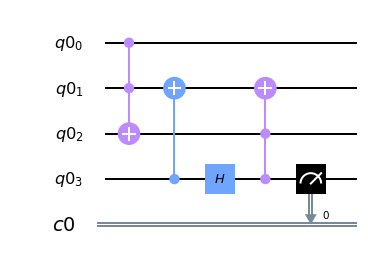

In [3]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import BasicAer, execute
from qiskit.quantum_info import Pauli, state_fidelity, basis_state, process_fidelity
q = QuantumRegister(4, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.cx(q[3], q[1])
qc.h(q[3])
qc.ccx(q[3], q[2], q[1])
qc.measure(q[3],c[0])
qc.draw(output='mpl')

In [4]:
qc.count_ops()

OrderedDict([('ccx', 2), ('cx', 1), ('h', 1), ('measure', 1)])

As you can see, this quantum circuit contains a Hadamard gate, a CX gate and CCX gates. By using qiskit.transpiler and importing PassManager, we can decompose this circuit into gates specified by the Unroller as shown below. In this case, into u3 gates and cx gates.

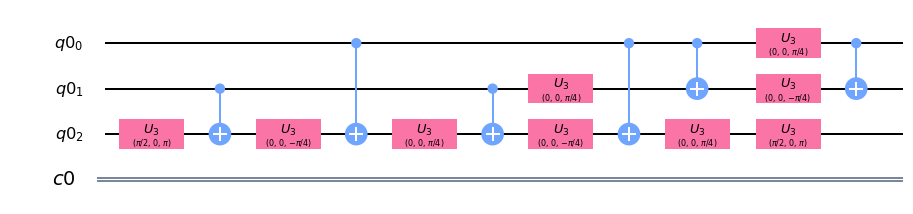

In [10]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [11]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

Thus, the cost of this circuit is $19+13\times10=149$.

You can easily check how any gates other than single-qubit gates and CX gates can be decomposed by the Unroller.  So, if you are interested in how a particular two-qubit gate or three-qubit gate can be decomposed, we encourage you to try it yourself. In the example below, we used the Unroller to decompose a CCX gate into u3 gates and CX gates. 

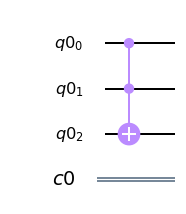

In [7]:
q = QuantumRegister(3, 'q0')
c = ClassicalRegister(1, 'c0')
qc = QuantumCircuit(q, c)
qc.ccx(q[0], q[1], q[2])
qc.draw(output='mpl')

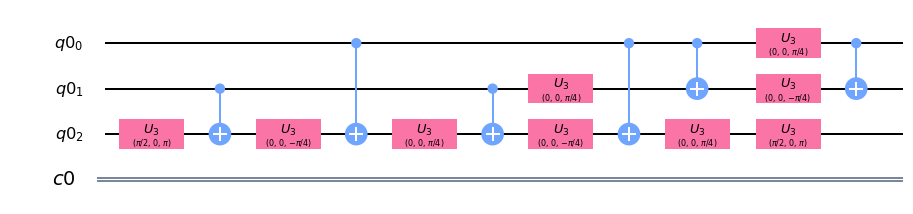

In [8]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [9]:
new_circuit.count_ops()

OrderedDict([('u3', 9), ('cx', 6)])

So, the total cost of a CCX gate can be calcualted as $9+6\times10=69$

Ta-da! Using the Unroller, you can decompose any circuit built with any gates into single-qubit u3 gates and CX gates! Easy, right?<br/>
During the final challenge (week 4), you will be asked to calculate the gate cost of your circuit. So, please revisit this page again when necesssary.